In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

In [2]:
try: 
    import pymc3
except:
    from pip._internal import main
    main(['install', 'pymc3'])
    import pymc3
from pymc3 import Poisson

x=Poisson.dist(mu=1)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Mathew Holden\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
samples = x.random(size=10000)

In [4]:
samples.mean()

0.983

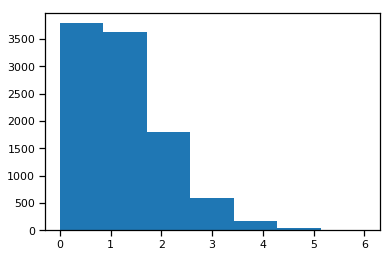

In [5]:
plt.hist(samples, bins=len(set(samples)));

In [6]:
from pymc3 import Normal

y= Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)

In [7]:
samples.mean()

-2.0199178862518448

In [8]:
samples.std()

3.9866761472552636

(array([  27.,  191.,  820., 1933., 2811., 2438., 1261.,  424.,   82.,
          13.]), array([-15.72474571, -12.83025489,  -9.93576408,  -7.04127327,
         -4.14678245,  -1.25229164,   1.64219917,   4.53668999,
          7.4311808 ,  10.32567162,  13.22016243]), <a list of 10 Patch objects>)

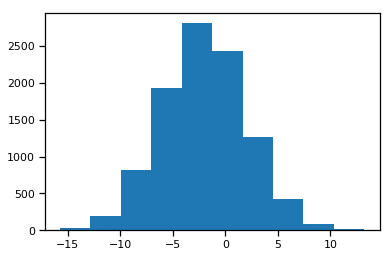

In [9]:
plt.hist(samples)

In [10]:
radon = pd.read_csv('radon.csv', index_col =0)

In [11]:
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


C:\Users\Mathew Holden\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


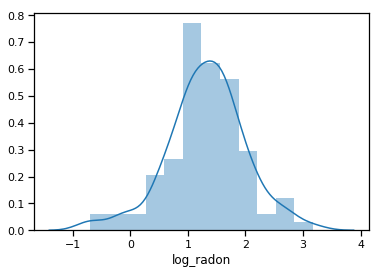

In [12]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [13]:
hennepin_radon.shape

(105,)

In [14]:
from pymc3 import Model, Uniform

with Model() as radon_model:
    u=Normal('u', mu=0, sd=10)
    o=Uniform('o',0,10)

In [15]:
with radon_model:
    y=Normal('y', mu=u, sd=o, observed=hennepin_radon)

In [16]:
from pymc3 import fit
with radon_model:
    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 136.32: 100%|██████████| 10000/10000 [01:32<00:00, 108.33it/s]
Finished [100%]: Average Loss = 136.28


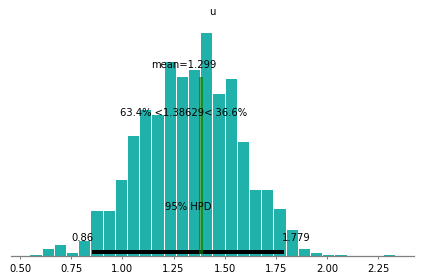

In [17]:
from pymc3 import plot_posterior
plot_posterior(samples, varnames=['u'], ref_val=np.log(4), color='LightSeaGreen');

In [18]:
mus = samples['u']
sigmas = samples['o']
mus

array([1.53131507, 1.56109105, 1.72234075, 1.13420831, 1.49800077,
       1.09247596, 1.55106252, 1.13013325, 1.14491412, 1.06217339,
       1.28163899, 1.00952043, 1.21003981, 1.18211037, 1.38445231,
       1.07691127, 1.24214706, 1.10377994, 1.38687618, 1.76345766,
       1.31530154, 0.90453827, 1.01818578, 1.48130426, 1.29352035,
       1.02859088, 1.29412141, 1.20021434, 0.80169626, 1.18607294,
       1.00635498, 0.86834761, 1.07085746, 1.04970186, 1.13974038,
       1.53602917, 1.73102087, 2.30512882, 1.39807538, 1.69072625,
       1.36551644, 1.26956056, 1.68738876, 1.51241919, 1.06341051,
       1.45417002, 1.52825656, 1.3529094 , 1.27644388, 1.22694071,
       1.54603076, 1.03815693, 1.25396186, 1.48387023, 1.54661269,
       1.34727844, 0.92606102, 1.12887726, 1.40241216, 1.34276523,
       1.20281482, 2.02665289, 1.26176568, 1.59512887, 1.09456703,
       1.43280779, 1.15409063, 1.11752027, 0.51574104, 1.69944917,
       1.54371147, 1.21695355, 1.33468758, 1.43211511, 0.82584

In [19]:
radon_samples = Normal.dist(mus, sigmas).random()

In [20]:
(radon_samples > np.log(4)).mean()

0.477

C:\Users\Mathew Holden\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


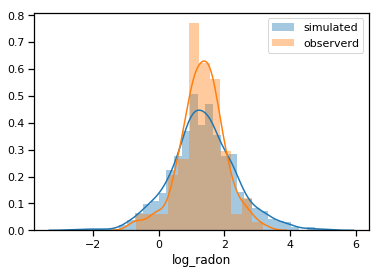

In [21]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observerd')
plt.legend()

In [22]:
from pymc3 import Flat, HalfCauchy
with Model() as prior_sensitivity:
    u=Flat('u')
    o=HalfCauchy('o',5)
    dist=Normal('dist', mu=u, sd=o,observed=hennepin_radon)
    sensitivity_samples=fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 123.88: 100%|██████████| 10000/10000 [01:20<00:00, 124.01it/s]
Finished [100%]: Average Loss = 123.86


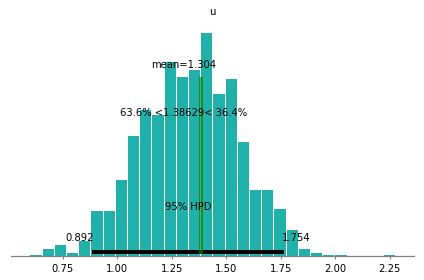

In [23]:
plot_posterior(sensitivity_samples, varnames=['u'], ref_val=np.log(4), color='LightSeaGreen')

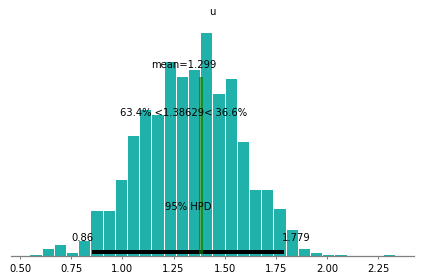

In [24]:
plot_posterior(samples, varnames=['u'], ref_val=np.log(4), color='LightSeaGreen');

In [25]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,150,98,101,100,123,105,103,100,95,102,100,109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,96,103,124,101,101,100,101,101,104,100,101),
                        groups='drug'))

In [26]:
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,101,100,88,101,100,102,99,100,99),
                           groups='pacebo'))

In [27]:
trial_data=pd.concat([drug, placebo], ignore_index=True)

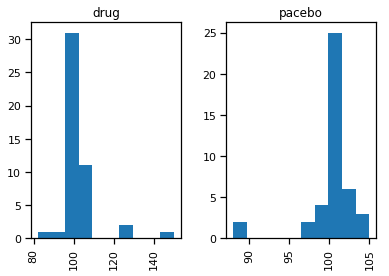

In [28]:
trial_data.hist('iq', by='groups');

In [29]:
from pymc3 import StudentT

In [30]:
t = StudentT.dist(nu=3).random(size=10000)
n = Normal.dist(0,1).random(size=10000)

C:\Users\Mathew Holden\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


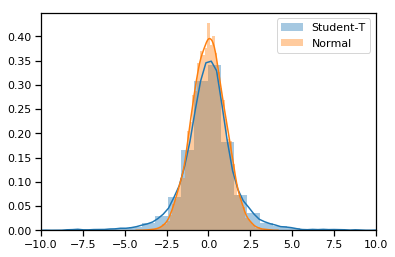

In [31]:
sns.distplot(t, label='Student-T')
sns.distplot(n, label='Normal')
plt.legend()
plt.xlim(-10,10);

In [32]:
with Model() as drug_model:
    u_0 = Normal('u_0', 100, sd=10)
    u_1 = Normal('u_1', 100, sd=10)

In [33]:
with drug_model:
    o_0 = Uniform('o_0', lower=0, upper=20)
    o_1 = Uniform('o_1', lower=0, upper=20)

In [34]:
from pymc3 import Exponential
with drug_model:
    v=Exponential('v_minus_one', 1/29.)+1

C:\Users\Mathew Holden\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


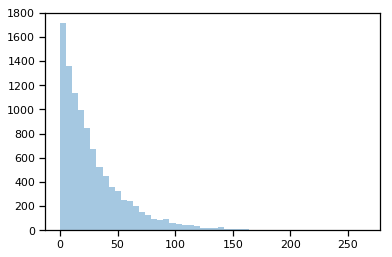

In [35]:
sns.distplot(Exponential.dist(1/29).random(size=10000), kde=False)

In [36]:
from pymc3 import StudentT
with drug_model:
    drug_like = StudentT('drug_like', nu=v, mu=u_1, lam=o_1**-2, observed=drug.iq)
    placebo_like= StudentT('placebo_like', nu=v, mu=u_0, lam=o_0**-2, observed=placebo.iq)

In [37]:
from pymc3 import Deterministic
with drug_model:
    diff_of_means=Deterministic('difference of means', u_1 - u_0)
    effect_size = Deterministic('effect size', diff_of_means/np.sqrt((o_1**2+o_0**2)/2))

In [38]:
with drug_model:
    drug_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 255.25: 100%|██████████| 10000/10000 [02:50<00:00, 58.48it/s]
Finished [100%]: Average Loss = 255.2


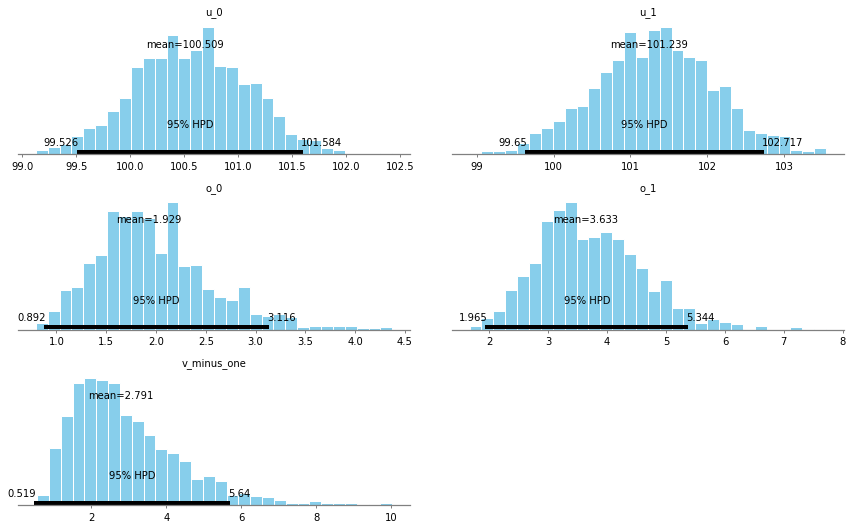

In [39]:
plot_posterior(drug_trace[100:],
              varnames=['u_0','u_1', 'o_0','o_1', 'v_minus_one'],
              color='#87ceeb');

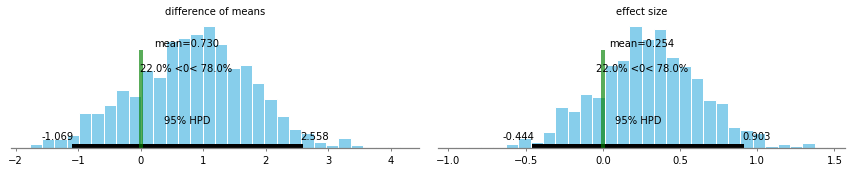

In [40]:
plot_posterior(drug_trace[100:],
              varnames=['difference of means', 'effect size'],
              ref_val=0,
              color='#87ceeb');

In [41]:
nash_precip = pd.read_table('nashville_precip.txt',
                           delimiter='\s+', na_values='NA', index_col=0)
nash_precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [42]:
july_rain = nash_precip.Jul
jan_rain = nash_precip.Jan

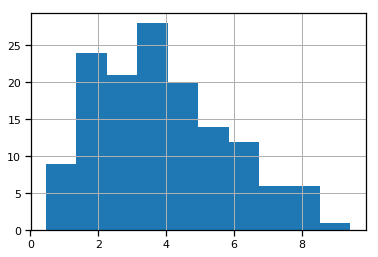

In [43]:
july_rain.hist()

In [44]:
from pymc3 import distributions
dir(distributions)

['AR',
 'AR1',
 'Bernoulli',
 'Beta',
 'BetaBinomial',
 'Binomial',
 'Bound',
 'Categorical',
 'Cauchy',
 'ChiSquared',
 'Constant',
 'ConstantDist',
 'Continuous',
 'DensityDist',
 'Dirichlet',
 'Discrete',
 'DiscreteUniform',
 'DiscreteWeibull',
 'Distribution',
 'ExGaussian',
 'Exponential',
 'Flat',
 'GARCH11',
 'Gamma',
 'GaussianRandomWalk',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfFlat',
 'HalfNormal',
 'HalfStudentT',
 'Interpolated',
 'InverseGamma',
 'KroneckerNormal',
 'Kumaraswamy',
 'LKJCholeskyCov',
 'LKJCorr',
 'Laplace',
 'Logistic',
 'LogitNormal',
 'Lognormal',
 'MatrixNormal',
 'Mixture',
 'Multinomial',
 'MvGaussianRandomWalk',
 'MvNormal',
 'MvStudentT',
 'MvStudentTRandomWalk',
 'NegativeBinomial',
 'NoDistribution',
 'Normal',
 'NormalMixture',
 'OrderedLogistic',
 'Pareto',
 'Poisson',
 'Rice',
 'SkewNormal',
 'StudentT',
 'TensorType',
 'Triangular',
 'TruncatedNormal',
 'Uniform',
 'VonMises',
 'Wald',
 'Weibull',
 'Wishart',
 'WishartBartlett',
 'ZeroInf

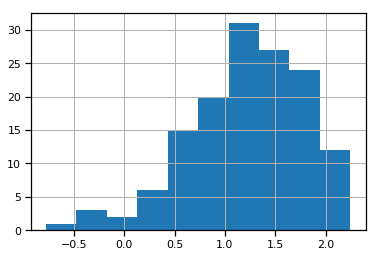

In [45]:
july_rain.apply(np.log).hist()

In [46]:
from pymc3 import Gamma

In [50]:
with Model() as rainfall_model:
    σ=Uniform('σ', 0, 1000)
    mu_jan = Uniform('mu_jan',0,25)
    mu_jul = Uniform('mu_jul',0,25)
    jan = Gamma('jan',mu=mu_jan, sd=σ, observed=jan_rain)
    jul = Gamma('jul',mu=mu_jul, sd=σ, observed=july_rain)
    d = Deterministic('d', mu_jan - mu_jul)

In [51]:
with rainfall_model:
    samples = fit(20000).sample(1000)

Average Loss = 909.92: 100%|██████████| 20000/20000 [04:19<00:00, 77.15it/s] 
Finished [100%]: Average Loss = 909.89


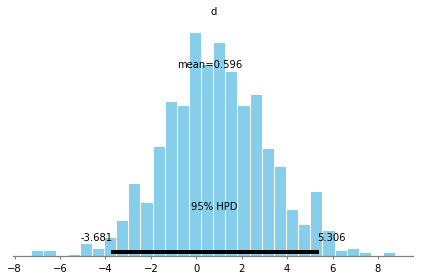

In [52]:
plot_posterior(samples, varnames=['d'])

In [54]:
vlbw = pd.read_csv('vlbw.csv', index_col=0).dropna(axis=0, subset=['ivh','pneumo'])
vlbw.head()

,birth,exit,hospstay,lowph,pltct,race,bwt,gest,inout,twn,...,vent,pneumo,pda,cld,pvh,ivh,ipe,year,sex,dead
5,81.593002,81.598999,2.0,6.969997,54.0,black,925.0,28.0,born at Duke,0.0,...,1.0,1.0,0.0,0.0,definite,definite,NaN,81.594055,female,1
6,81.601997,81.771004,62.0,7.189999,NaN,white,940.0,28.0,born at Duke,0.0,...,1.0,0.0,0.0,0.0,absent,absent,absent,81.602295,female,0
13,81.683998,81.853996,62.0,7.179996,182.0,black,1110.0,28.0,born at Duke,0.0,...,0.0,1.0,0.0,1.0,absent,absent,absent,81.684448,male,0
14,81.689003,81.877998,69.0,7.419998,361.0,white,1180.0,28.0,born at Duke,0.0,...,0.0,0.0,0.0,0.0,absent,absent,absent,81.689880,male,0
16,81.696999,81.952004,93.0,7.239998,255.0,black,770.0,26.0,born at Duke,0.0,...,1.0,0.0,0.0,1.0,absent,absent,absent,81.698120,male,0


In [55]:
pd.crosstab(vlbw.ivh, vlbw.pneumo)

pneumo,0.0,1.0
ivh,,
absent,359,73
definite,45,30
possible,6,4


In [59]:
ivh = vlbw.ivh.isin(['definite','possible']).astype(int).values
x = vlbw.pneumo.astype(int).values

C:\Users\Mathew Holden\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


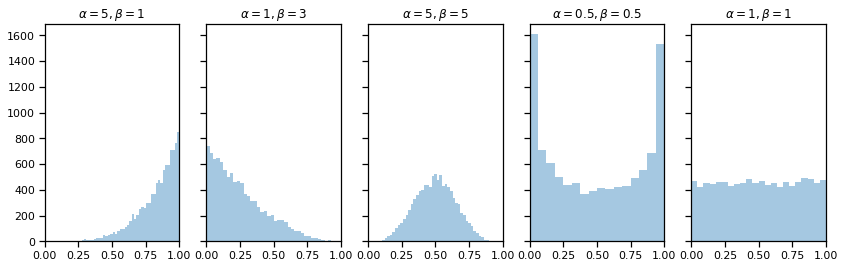

In [65]:
from pymc3 import Beta
params = (5,1), (1,3),(5,5),(0.5,0.5),(1,1)
fig, axes = plt.subplots(1,len(params), figsize=(14,4), sharey=True)
for ax, (alpha, beta) in zip(axes, params):
    sns.distplot(Beta.dist(alpha, beta).random(size=10000), ax=ax, kde=False)
    ax.set_xlim(0,1)
    ax.set_title(r'$\alpha={0}, \beta={1}$'.format(alpha, beta));

In [62]:
with Model() as ivh_model:
    p=Beta('p',1,1,shape=2)

In [64]:
from pymc3 import Bernoulli
with ivh_model:
    bb_like = Bernoulli('bb_like', p=p[x], observed=ivh)

In [66]:
with ivh_model:
    p_diff = Deterministic('p_diff',p[1]-p[0])

In [67]:
with ivh_model:
    ivh_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 226.71: 100%|██████████| 10000/10000 [04:55<00:00, 34.65it/s]
Finished [100%]: Average Loss = 226.71


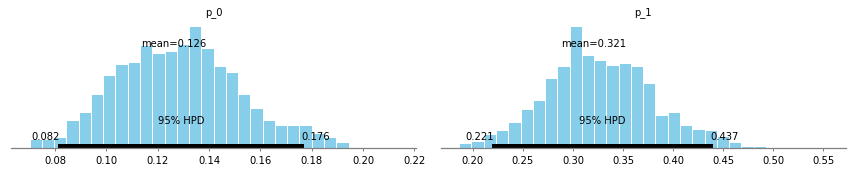

In [68]:
plot_posterior(ivh_trace[100:], varnames=['p'], color='#87ceeb');

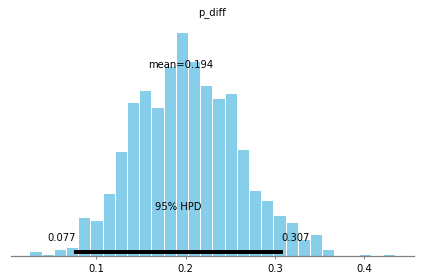

In [69]:
plot_posterior(ivh_trace[100:], varnames=['p_diff'], color='#87ceeb');

In [70]:
print('Mathew Holden')

Mathew Holden
